<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/Face_detec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import glob
import matplotlib.pyplot as plt
from random import randint
from keras.callbacks import EarlyStopping
from random import randint

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_list = glob.glob('/content/drive/MyDrive/dataset_face_dec/train/*.jpg')
train_list.sort()
print (train_list)
test_list = glob.glob('/content/drive/MyDrive/dataset_face_dec/Val/*.jpg')
test_list.sort()
print (test_list)

[]
[]


In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/dataset_face_dec/train',target_size=(150,150))
validation_set=train.flow_from_directory('/content/drive/MyDrive/dataset_face_dec/Val',target_size=(150,150))

Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'KHANG': 0, 'TIEN': 1, 'TRI': 2}

In [ ]:
x_train = np.zeros([len(train_list),150,150,3],dtype=np.uint8)

for i in range(len(train_list)):
  image = load_img(train_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_train[i] = array

x_test = np.zeros([len(test_list),150,150,3],dtype=np.uint8)

for i in range(len(test_list)):
  image = load_img(test_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_test[i] = array

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
y_train = np.zeros([len(train_list)])
y_test = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2])

for i in range (len(train_list)):
  if i>21 and i<=len(train_list):
    y_train[i] = 1
  else:
    y_train[i] = 0
y_train = np_utils.to_categorical(y_train,3)
y_test = np_utils.to_categorical(y_test,3)
y_label = ['KHANG','TRI','TIEN']
print(y_train)

[]


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 67500)             0         
                                                                 
 dense_43 (Dense)            (None, 128)               8640128   
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 3)                 195       
                                                                 
Total params: 8,648,579
Trainable params: 8,648,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 50, batch_size=120, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=80)])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 262ms/step - loss: 38.9586 - accuracy: 0.6000 - val_loss: 4.1705 - val_accuracy: 0.6667
Epoch 2/50
3/3 [==============================] - 0s 162ms/step - loss: 1.5347 - accuracy: 0.8222 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
3/3 [==============================] - 0s 164ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
3/3 [==============================] - 0s 166ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
3/3 [==============================] - 0s 156ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
3/3 [==============================] - 0s 163ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
3/3 [==============================] - 0s 163ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_acc

In [ ]:
model.save('ANN_face.h5')

In [ ]:
from keras.models import load_model
ANN_face =load_model('ANN_face.h5')

Sai số kiểm tra là:  0.0
Độ chính xác kiểm tra là:  1.0


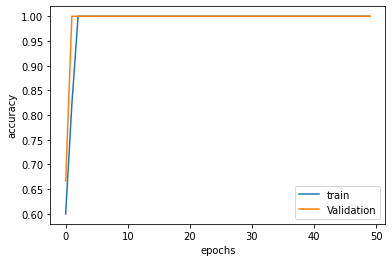

In [ ]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

2
TRI


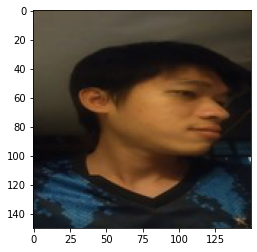

In [ ]:
img_path = '/content/drive/MyDrive/dataset_face_dec/test/tri_03.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
face = np.argmax(ANN_face.predict(img))
pred = model.predict(img)
classes = ['KHANG','TIEN','TRI']
print(np.argmax(pred))
if face==0: print(classes[0])
elif face==1: print(classes[1])
elif face==2: print(classes[2])

1
TIEN


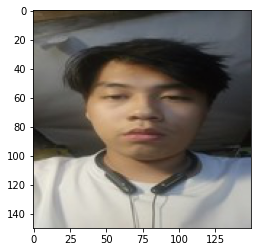

In [ ]:
img_path = '/content/drive/MyDrive/dataset_face_dec/test/tien_09.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
face = np.argmax(ANN_face.predict(img))
pred = model.predict(img)
classes = ['KHANG','TIEN','TRI']
print(np.argmax(pred))
if face==0: print(classes[0])
elif face==1: print(classes[1])
elif face==2: print(classes[2])